In [2]:
import pandas as pd
import numpy as np



In [3]:
import pandas as pd

# ✅ Load Dataset
file_path = "unseandata.csv"
data = pd.read_csv(file_path)

# ✅ Print Dataset Features
print("\n🔍 **Dataset Features:**")
print(data.columns.tolist())



🔍 **Dataset Features:**
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# ✅ Load Dataset
data = pd.read_csv("unseandata.csv")

# ✅ Separate Features and Target
X = data.drop(columns=['TenYearCHD'])  # Features
y = data['TenYearCHD']  # Target

# ✅ Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train Random Forest for Feature Importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# ✅ Get Feature Importance
importances = model.feature_importances_

# ✅ Print Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("\n🔥 **Feature Importance:**")
print(feature_importance)



🔥 **Feature Importance:**
            Feature  Importance
10            sysBP    0.130566
12              BMI    0.127613
1               age    0.126162
9           totChol    0.115480
11            diaBP    0.113529
13        heartRate    0.099783
14          glucose    0.096466
4        cigsPerDay    0.054501
2         education    0.044291
0              male    0.023677
7      prevalentHyp    0.019769
5            BPMeds    0.017991
3     currentSmoker    0.014510
8          diabetes    0.010945
6   prevalentStroke    0.004718


<Figure size 1200x800 with 0 Axes>

d:\Rreserch work\fedenvioremnt\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


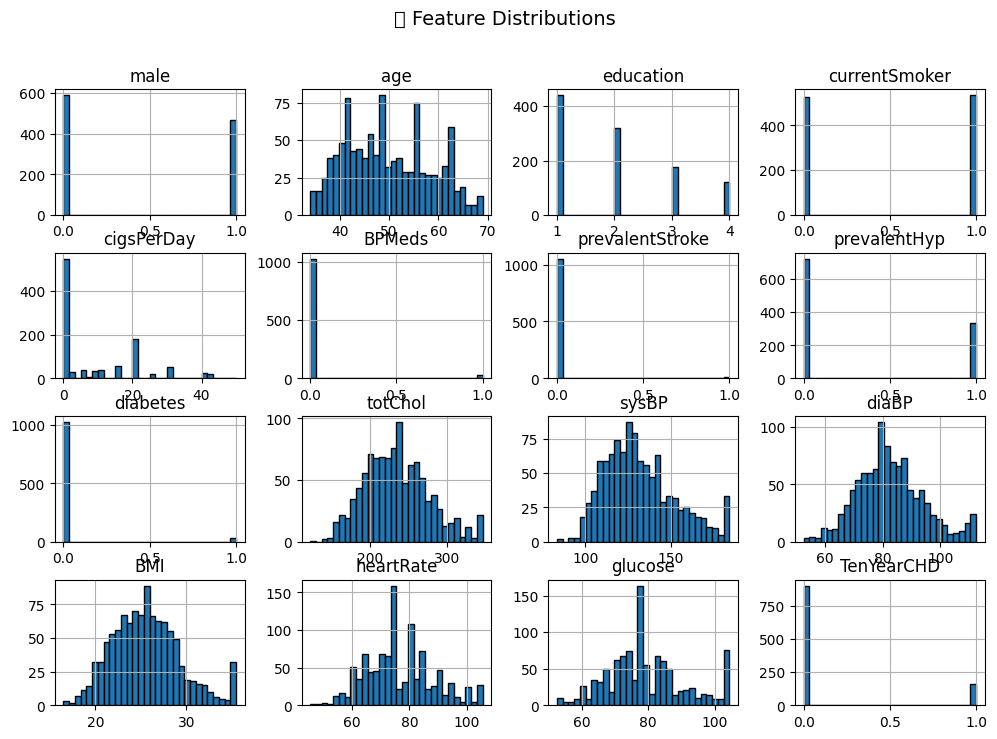

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Plot Distribution of Each Feature
plt.figure(figsize=(12, 8))
data.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("📊 Feature Distributions", fontsize=14)
plt.show()


✅ Using device: cuda
📌 Epoch 1/80 - Loss: 0.6617
📌 Epoch 2/80 - Loss: 0.6149
📌 Epoch 3/80 - Loss: 0.5992
📌 Epoch 4/80 - Loss: 0.5878
📌 Epoch 5/80 - Loss: 0.5775
📌 Epoch 6/80 - Loss: 0.5763
📌 Epoch 7/80 - Loss: 0.5612
📌 Epoch 8/80 - Loss: 0.5612
📌 Epoch 9/80 - Loss: 0.5527
📌 Epoch 10/80 - Loss: 0.5455
📌 Epoch 11/80 - Loss: 0.5366
📌 Epoch 12/80 - Loss: 0.5362
📌 Epoch 13/80 - Loss: 0.5277
📌 Epoch 14/80 - Loss: 0.5233
📌 Epoch 15/80 - Loss: 0.5135
📌 Epoch 16/80 - Loss: 0.5103
📌 Epoch 17/80 - Loss: 0.4987
📌 Epoch 18/80 - Loss: 0.5082
📌 Epoch 19/80 - Loss: 0.4803
📌 Epoch 20/80 - Loss: 0.4883
📌 Epoch 21/80 - Loss: 0.4772
📌 Epoch 22/80 - Loss: 0.4782
📌 Epoch 23/80 - Loss: 0.4751
📌 Epoch 24/80 - Loss: 0.4701
📌 Epoch 25/80 - Loss: 0.4603
📌 Epoch 26/80 - Loss: 0.4584
📌 Epoch 27/80 - Loss: 0.4523
📌 Epoch 28/80 - Loss: 0.4528
📌 Epoch 29/80 - Loss: 0.4307
📌 Epoch 30/80 - Loss: 0.4377
📌 Epoch 31/80 - Loss: 0.4259
📌 Epoch 32/80 - Loss: 0.4185
📌 Epoch 33/80 - Loss: 0.4110
📌 Epoch 34/80 - Loss: 0.4203
📌 

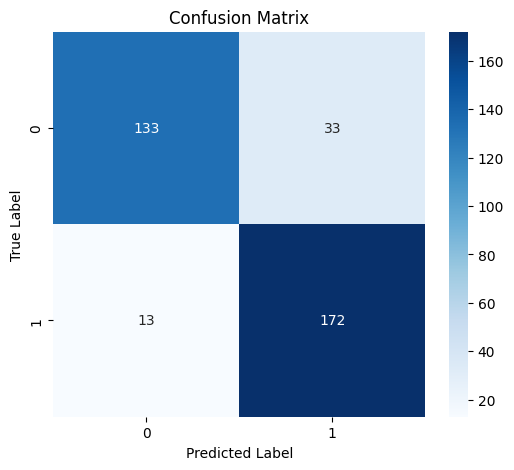

✅ Model Accuracy: 0.8689
📌 Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       166
         1.0       0.84      0.93      0.88       185

    accuracy                           0.87       351
   macro avg       0.87      0.87      0.87       351
weighted avg       0.87      0.87      0.87       351

🎯 ROC-AUC Score: 0.9264


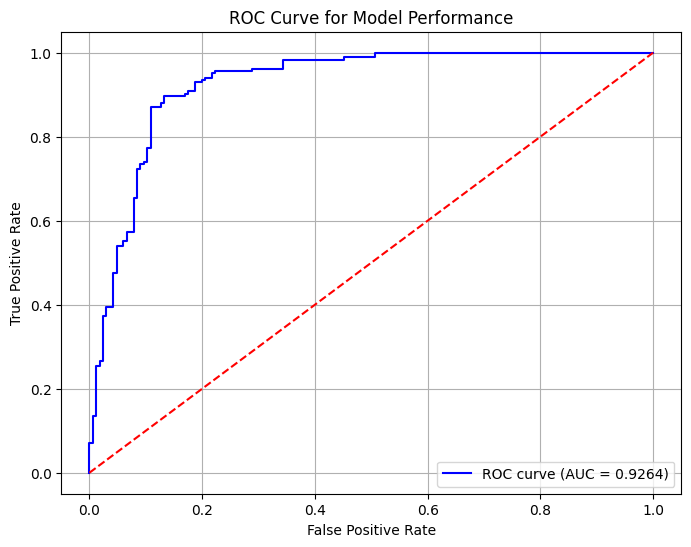

In [16]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# ✅ Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# ✅ Load and Preprocess the Dataset
file_path = "framingham_part1.csv"  
data = pd.read_csv(file_path)

# ✅ Separate Features and Target
X = data.drop(columns=['TenYearCHD']).values
y = data['TenYearCHD'].values

# ✅ Upsample Minority Class
train_data = pd.DataFrame(X, columns=data.drop(columns=['TenYearCHD']).columns)
train_data["TenYearCHD"] = y

majority_class = train_data[train_data["TenYearCHD"] == 0]
minority_class = train_data[train_data["TenYearCHD"] == 1]

desired_samples = int(len(majority_class) * 0.98 + (len(majority_class) * 0.02 * np.random.rand()))
minority_upsampled = resample(minority_class, replace=True, n_samples=desired_samples, random_state=42)

train_resampled = pd.concat([majority_class, minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# ✅ Scale Features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(train_resampled.drop(columns=["TenYearCHD"]).values)
y_train_resampled = train_resampled["TenYearCHD"].values

# ✅ Convert to Tensors
X_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).to(device)

# ✅ Train-Test Split (80-20)
split = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:split], X_tensor[split:]
y_train, y_test = y_tensor[:split], y_tensor[split:]

# ✅ Create DataLoader for Training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ✅ Define Model
class GlobalModel(nn.Module):
    def __init__(self, input_size):
        super(GlobalModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

input_size = X_train.shape[1]
model = GlobalModel(input_size).to(device)

# ✅ Define Optimizer and Loss Function
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# ✅ Train the Model
num_epochs = 80
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"📌 Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")

# ✅ Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test).squeeze().cpu().numpy()
    y_pred = (y_pred_prob > 0.5).astype(int)
    y_test_np = y_test.cpu().numpy()

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ Compute Accuracy Score
accuracy = np.mean(y_pred == y_test_np)  # Simple accuracy calculation
print(f"✅ Model Accuracy: {accuracy:.4f}")

# ✅ Classification Report
print("📌 Classification Report:\n", classification_report(y_test_np, y_pred))

# ✅ Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test_np, y_pred_prob)
print(f"🎯 ROC-AUC Score: {roc_auc:.4f}")

# ✅ Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_np, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Performance")
plt.legend()
plt.grid()
plt.show()


In [ ]:


# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report (Precision, Recall, F1-Score)
print("📌 Classification Report:\n", classification_report(y_test, y_pred))





In [ ]:
# ✅ Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"🎯 ROC-AUC Score: {roc_auc:.4f}")

In [ ]:
# ✅ Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Performance")
plt.legend()
plt.grid()
plt.show()
